In [1]:
import numpy as np
from gaussian_approximation import get_pte_from_gaussian
from kde_method import get_pte_KDE
from nearest_neighbour_method import get_pte_nearest_neighbour
from stats import *

One dimensional test case, x0 is at 1 sigma

In [2]:
nsamples = int(1e5)

x0 = 2
mean = 0
cov = 1

In [3]:
pte = get_pte_from_gaussian(x0, mean, cov, nsamples)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

PTE = 0.04527999999999999
Number of sigma = 2.0020439954059306


Two dimensional test case

In [4]:
x0 = np.array([np.sqrt(6),0])
mean = (0, 0)
cov = [[1, 0], [0, 1]]

In [5]:
pte = get_pte_from_gaussian(x0, mean, cov, nsamples)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

PTE = 0.050000000000000044
Number of sigma = 1.959963984540054


Compare with KDE method from a chain with the same covariance and means

In [6]:
path_to_chains = '/Users/Pablo/Code/PolyChordLite_old/chains/gauss'

In [7]:
#pte = get_pte_KDE(x0, path_to_chains, bandwidth = 0.1, rtol = 1e-4)
#nsigma = get_nsigma(pte)

#print('PTE =', pte)
#print('Number of sigma =', nsigma)

In [8]:
pte = get_pte_nearest_neighbour(x0, path_to_chains)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

[2.43077528 0.02965162]
-4.792650903812715
PTE = 0.052338199286417364
Number of sigma = 1.9403415142429987


I think the KDE stops working in a 5D case. Lets try it 

In [29]:
x0 = np.ones(5)
mean = np.zeros(5)
cov = np.identity(5)

In [30]:
pte = get_pte_from_gaussian(x0, mean, cov, nsamples)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

PTE = 0.415285
Number of sigma = 0.814628485536157


In [ ]:
path_to_chains = '/Users/Pablo/Code/PolyChordLite_old/chains/gauss_5d'

Now try with the DES and Planck case. First, the Gaussian approximation. We can build a covariance from both covariances

In [9]:
#DES case
path_to_chains = '/Users/Pablo/Projets/Tension/diff_chains/diff'

means_planck = np.loadtxt('/Users/Pablo/Projets/Tension/sims_mean_var/baseline/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]
x1_s8 = np.loadtxt('/Users/Pablo/Projets/Tension/sims_mean_var/s8_1sigma/cosmological_parameters/values.txt', usecols = [2], unpack=True)[[17,3,13,10,0]]
x0 = x1_s8 - means_planck
x0[4] = x0[4]*1e9

c_des = np.loadtxt('/Users/Pablo/Projets/Tension/chains/chains_poly/0.01_tolerance/d_noiseless/covmat.txt') 
c_planck = np.loadtxt('/Users/Pablo/Projets/Tension/chains/chains_poly/0.01_tolerance/planck_poly0.01/covmat.txt') 

c_des = c_des[:5, :5]
c_des[4] = c_des[4]*1e9
c_des[:,4] = c_des[:,4]*1e9

c_planck = c_planck[:5, :5]
c_planck[4] = c_planck[4]*1e9
c_planck[:,4] = c_planck[:,4]*1e9

mean = np.zeros(5)
cov = c_des+c_planck

nsamples = int(1e6)

Test with Planck only first

In [10]:
x1 = np.copy(means_planck)
x1 += 0.1*np.sqrt(np.diag(c_planck))
#x1[4]*=1e9
#means_planck[4]*=1e9

pte = get_pte_from_gaussian(x1, means_planck, c_planck, nsamples)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

PTE = 0.36268999999999996
Number of sigma = 0.9102512911380762


In [11]:
path_to_chains = '/Users/Pablo/Projets/Tension/chains/chains_poly/0.01_tolerance/planck_poly0.01/planck'

In [12]:
from kde_method import *
weights, loglike_samples, X = load_chains(path_to_chains)

In [13]:
X = X[:,:5]
X.shape

(5658, 5)

In [14]:
kde = fit_kde(X, weights, bandwidth=0.0025, rtol = 1e-8)
loglike_kde = get_kde_loglike(X, kde)

In [15]:
loglike_x = get_kde_loglike([x1], kde)

In [16]:
pte = get_pte_from_samples(x0, loglike_x, loglike_kde, weights = weights)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

PTE = 0.0002789811970443923
Number of sigma = 3.6340736232428896


In [17]:
#ll = loglike_kde*max(-0.5*loglike_samples)/max(loglike_kde)

<function matplotlib.pyplot.show(*args, **kw)>

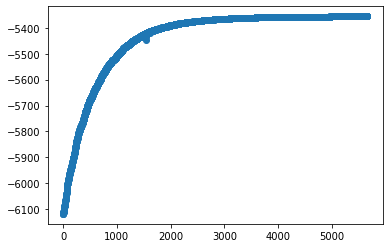

In [25]:
import matplotlib.pyplot as plt
i = np.arange(len(loglike_samples))
plt.scatter(i, loglike_samples)
plt.show

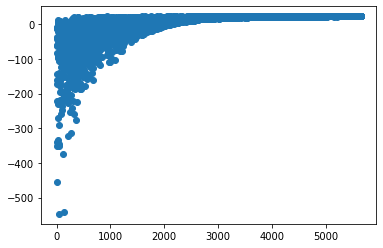

In [28]:
plt.scatter(i, loglike_kde)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-3, 1, 50)
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': bandwidths},
                    cv=20) # 20-fold cross-validation
grid.fit(X)
print(grid.best_params_)

In [13]:
pte = get_pte_from_gaussian(x0, mean, cov, nsamples)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

PTE = 0.684632
Number of sigma = 0.40615053020188596


In [14]:
x0[4] = x0[4]*1e-9

To compare, we use the difference chain and the nearest neighbour method

In [15]:
pte = get_pte_nearest_neighbour(x0, path_to_chains)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

[ 7.92836183e-03  4.07152033e-03  4.89785713e-04 -1.17588643e-03
 -2.78984334e-10 -3.55973899e-02]
-3.72704575257698
PTE = 0.0007548053346635442
Number of sigma = 3.3688571633312407


In [17]:
from kde_method import *

In [18]:
weights, loglike_samples, X = load_chains(path_to_chains)

In [23]:
ind = np.where(weights>0)
weights = weights[ind]
X = X[ind]

In [24]:
kde = fit_kde(X, weights, bandwidth=0.1, rtol = 1e-4)

In [25]:
loglike_kde = get_kde_loglike(X, kde)

In [27]:
loglike_x = get_kde_loglike([x0], kde)

In [33]:
pte = get_pte_from_samples(x0, loglike_x, loglike_kde, weights = weights)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

PTE = 0.957946404296205
Number of sigma = 0.05273079248048723


In [34]:
loglike_kde

array([6.68534759, 7.24488801, 7.36149273, ..., 7.27835825, 7.40312992,
       7.80977588])

In [ ]:
path_to_chains = '/Users/Pablo/Code/PolyChordLite_old/chains/gauss'
weights, loglike_samples, X = load_chains(path_to_chains)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut(len(X)))
grid.fit(X);

In [ ]:
grid = GridSearchCV(KernelDensity(kernel = 'gaussian'),{'bandwidth': np.linspace(0.1, 0.5, 20)}, cv = 5, iid = True)

In [ ]:
grid.fit(X)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-3, 1, 50)
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': bandwidths, 'rtol':1e-4*np.ones(len(bandwidths))},
                    cv=20) # 20-fold cross-validation
grid.fit(X[-5000:])
print(grid.best_params_)

In [ ]:
X.shape

In [ ]:
X[-5000:]